In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def friedmann_rhs(a, H0, Omega_m, Omega_r, Omega_de):
    return H0 * a * np.sqrt(Omega_m * a**(-3) + Omega_r * a**(-4) + Omega_de)

In [74]:
def solve_ordinary_adaptive(H0=1.0, Omega_m=0.315, Omega_r=9.2e-5, 
                           a_start=1e-6, a_end=1.0, 
                           min_dt=1e-12, max_dt=0.01, safety=0.1):

    # Initialize lists
    t_list = [0.0]
    a_list = [a_start]
    
    t = 0.0
    a = a_start
    
    Omega_de = 1.0 - Omega_m - Omega_r
    
    iteration = 0
    while a < a_end and iteration < 1000000:
        # Calculate current da/dt
        da_dt = friedmann_rhs(a, H0, Omega_m, Omega_r, Omega_de)

        if a < 1e-4:  # Radiation dominated early
            dt_stability = safety * a**2 / (H0 * np.sqrt(Omega_r))
        else:  # Matter or Λ dominated
            dt_stability = safety * a**(1.5) / (H0 * np.sqrt(Omega_m))
        
        # Choose dt
        dt = max(min_dt, min(max_dt, dt_stability))
        
        # Euler step
        a_new = a + dt * da_dt
        
        # Update
        t += dt
        a = a_new
        
        t_list.append(t)
        a_list.append(a)
        
        iteration += 1
    
    # Convert to arrays
    t_array = np.array(t_list)
    a_array = np.array(a_list)
    
    # Find present epoch (a=1)
    if np.any(a_array >= 1.0):
        idx_present = np.argmax(a_array >= 1.0)
        t_present = t_array[idx_present]
    else:
        # Interpolate if we didn't reach a=1
        idx = np.argmin(np.abs(a_array - 1.0))
        t_present = t_array[idx]

    return t_array, a_array, t_present

In [75]:
t, a, t_present = solve_ordinary_adaptive(H0=1.0, Omega_m=0.315, Omega_r=9.2e-5, 
                           a_start=1e-6, a_end=1.0, 
                           min_dt=1e-12, max_dt=0.01, safety=0.1)

In [76]:
# Convert to physical time (s)
H0_physical = 2.19e-18  # s⁻¹
seconds_per_year = 365.25 * 24 * 3600
seconds_per_Gyr = seconds_per_year * 1e9

# Time from Big Bang in s
t_s = t / H0_physical 

In [77]:
y_ticks = [1e1,1e3,1e5,1e7,1e9,1e11,1e13,1e15,1e17]

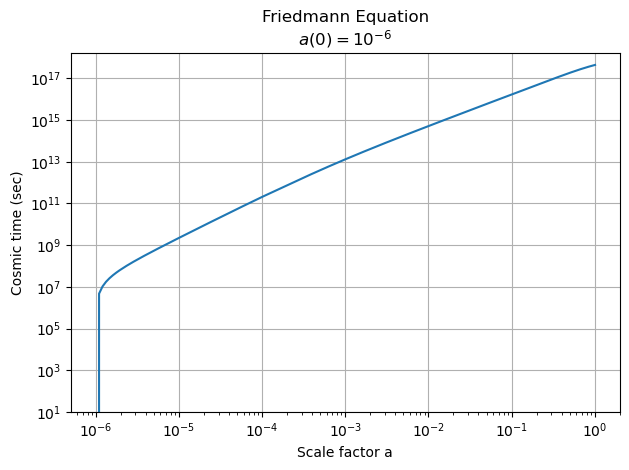

In [78]:
plt.loglog(a,t_s)
plt.xlabel(r"Scale factor a")
plt.ylabel(r"Cosmic time (sec)")
plt.yticks(y_ticks)
plt.title("Friedmann Equation\n$ a(0)=10^{-6}$")
plt.grid(True)
plt.tight_layout()
plt.show()

In [1]:
t_s[-1]

NameError: name 't_s' is not defined